# Scraping while Scrolling down to a specific element

In [1]:
from selenium import webdriver
import time
import nltk
from bs4 import BeautifulSoup
import missingno as msno
from newspaper import Article
import pandas as pd

In [2]:
from webdriver_manager.chrome import ChromeDriverManager

In [3]:
chrome_path = r'C:\Users\hp\Selenium\ChromeDriver\chromedriver_win32\chromedriver.exe'

driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Current google-chrome version is 85.0.4183
[WDM] - Get LATEST driver version for 85.0.4183
[WDM] - Get LATEST driver version for 85.0.4183


[WDM] - Trying to download new driver from http://chromedriver.storage.googleapis.com/85.0.4183.87/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\hp\.wdm\drivers\chromedriver\win32\85.0.4183.87]


In [4]:
driver.get('https://www.livemint.com/Search/Link/Keyword/fmcg-covid-19')

In [8]:
flag = driver.find_element_by_xpath("//*[@id='listheadline_11585222642782']/a")
driver.execute_script('arguments[0].scrollIntoView();', flag)

In [9]:
# Selenium script to scroll to the bottom, wait 3 seconds for the next batch of
# data to load, then continue scrolling.  It will continue to do this until the 
# page stops loading new data.
lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False
while match==False:
    lastCount = lenOfPage
    time.sleep(3)
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    if lastCount==lenOfPage:
        match=True

# Now that the page is fully scrolled, grab the source code.
source_data = driver.page_source

# Throw your source into BeautifulSoup and start parsing!
#bs_data = bs(source_data)

In [10]:
len(source_data)

281768

In [12]:
soup = BeautifulSoup(source_data)

In [35]:
#print(bs_data.prettify())

In [13]:
article_links = []

for h in soup.find_all('h2', attrs={'class': 'headline'}):
    for anch in h.find_all('a', href=True):
        if anch.text:
            article_links.append(anch['href'])
    
len(article_links)

70

In [7]:
type(article_links[0])

str

In [8]:
import os
os.chdir('E:/NewsFMCG')
os.getcwd()

'E:\\NewsFMCG'

In [9]:
# Writing the data to a csv

frame = []
upperframe = []

filename="LiveMint70.csv"
f = open(filename,"w", encoding = 'utf-8')
headers="Date, URL, Newspaper, Title, Article\n"
f.write(headers)

for link in article_links:
    url = 'https://www.livemint.com/' + link
    article = Article(url)
    article.download()
    article.parse()

    nw_date = str(article.publish_date)[:10]
    nw_url = str(article.url)
    nw_paper = 'LiveMint'
    nw_title = article.title
    
    text = article.text
    ult_text = ('').join(text.split('\n'))
    nw_article = ult_text

    frame.append((nw_date, nw_url, nw_paper, nw_title, nw_article))
    f.write(nw_date.replace(",","^") + "," + nw_url + "," + nw_paper + ","
            + nw_title.replace(",","^") + "," 
            + nw_article.replace(",","^") + "\n")
upperframe.extend(frame)

f.close()

In [10]:
data=pd.DataFrame(upperframe, columns=['Date', 'URL', 'Newspaper', 'Title', 'Article'])
data.head()

,Date,URL,Newspaper,Title,Article
0,2020-08-24,https://www.livemint.com//market/mark-to-marke...,LiveMint,Q1 results reveal how covid-proof FMCG compani...,The coronavirus pandemic struck at a time when...
1,2020-08-11,https://www.livemint.com//news/india/covid-sur...,LiveMint,Covid survey: 90% of consumers making lasting ...,NEW DELHI: Covid-19 has led to changes in cons...
2,2020-08-07,https://www.livemint.com//companies/news/packa...,LiveMint,Packaged products' demand can touch pre-covid ...,"NEW DELHI: Jyothy Labs Limited, that sells Mar..."
3,2020-08-06,https://www.livemint.com//companies/news/fmcg-...,LiveMint,FMCG cos put covid learnings to practice,NEW DELHI : India’s top packaged consumer good...
4,2020-08-05,https://www.livemint.com//companies/news/covid...,LiveMint,Covid prompts FMCG firms to look at efficient ...,NEW DELHI: India's top packaged consumer goods...


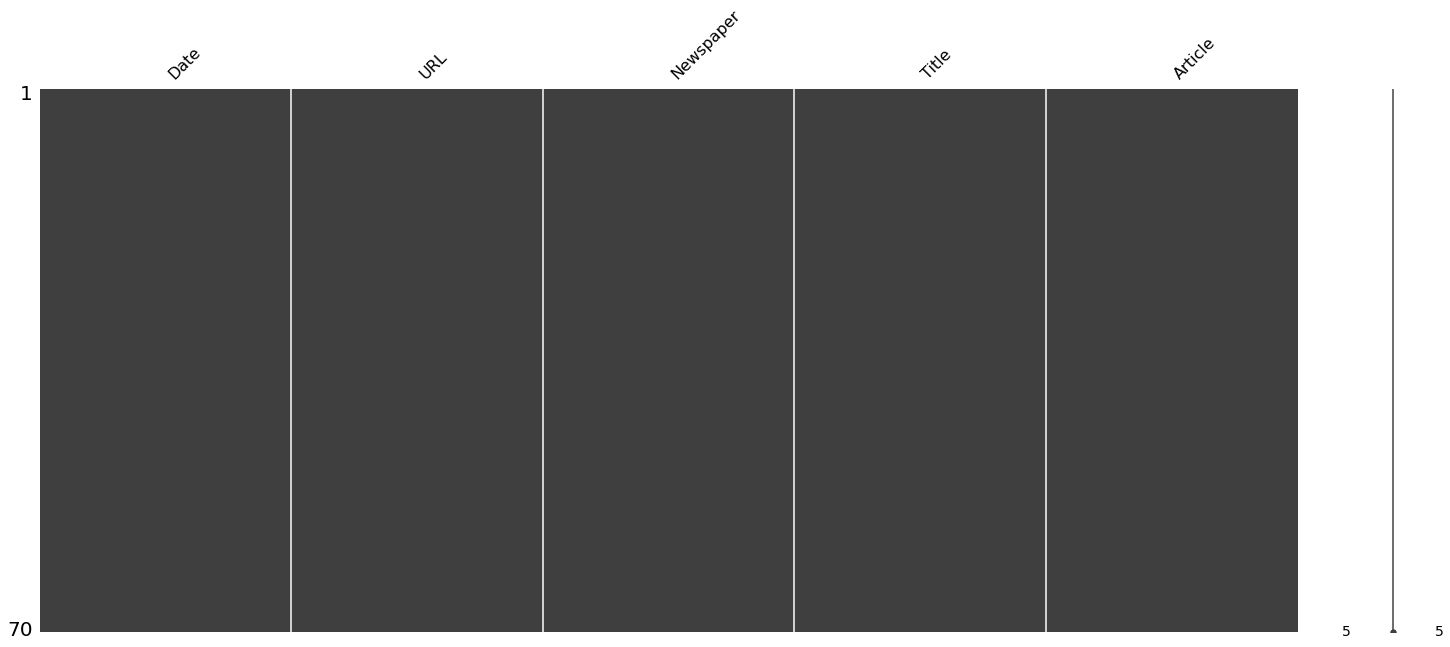

In [11]:
msno.matrix(data)

In [14]:
print(os.path.abspath(filename))

E:\NewsFMCG\LiveMint70.csv


# BeautifulSoup

## Testing Newspaper3k for the first Page link 